In [17]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from matplotlib import pyplot as plt
from pandas import DataFrame
from collections import Counter

In [22]:
X,y =make_blobs(n_samples=1000,random_state=3,centers=2)

In [23]:
print(X.shape, y.shape)
print(Counter(y))

(1000, 2) (1000,)
Counter({np.int64(1): 500, np.int64(0): 500})


## Classe bien equilibree

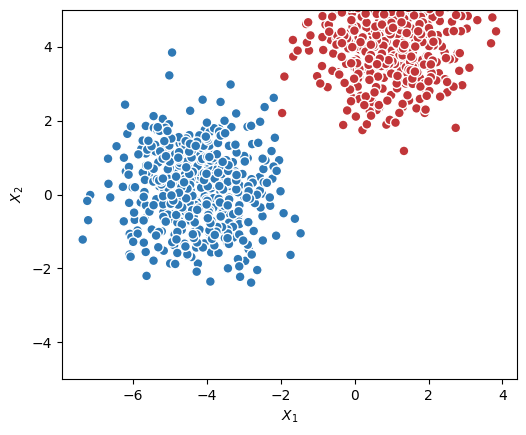

In [24]:
# axes =plt.axes()
# plt.scatter(X[:,0],X[:,1],c=y.ravel(),vmax=1.2,vmin=-.2,edgecolors='white',cmap="RdBu",linewidths=1)
# axes.set(aspect="equal",ylim=(-5,5),xlabel="$X_1$",ylabel="$X_2$")
# plt.show()

#visualiser les donees
axes = plt.axes()
plt.scatter(X[:,0],X[:,1], c=y.ravel(), s=50,cmap="RdBu", vmin=-.2,vmax=1.2,edgecolor="white", linewidth=1)
axes.set(aspect="equal",ylim=(-5, 5), xlabel="$X_1$", ylabel="$X_2$")
plt.show()

#### Séparer les données en deux parties (training and test) en utilisant la fonction train_test_split du module sklearn.model_selection

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 2) (200, 2) (800,) (200,)


### sklearn.preprocessing contient des fonctions de normalisation des données. Nous considérons ici les deux types de normalisation : la standardisation par la fonction StandardScaler et le range scaling par la fonction MinMaxScaler.

In [26]:
scaler = StandardScaler().fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

# with minmax
min_max_scaler = MinMaxScaler().fit(X_train)
X_minmax_train = min_max_scaler.transform(X_train)
X_minmax_test = min_max_scaler.transform(X_test)


### Q4. La méthode de régression logistique est implémentée dans le module sklearn.linear_model sous le nom LogisticRegression

In [27]:
model = LogisticRegression(random_state=42)
model.fit(X_scaled_train,y_train)
y_train_pred = model.predict(X_scaled_train)
y_test_pred = model.predict(X_scaled_test)

### Accuracy

In [28]:
accuracy =metrics.accuracy_score(y_test,y_test_pred)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 100.00


### Classification report

In [29]:
print(f"Classification report:\n{metrics.classification_report(y_test,y_test_pred)}")

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       101

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



### cohen_kappa_score

In [30]:
print(f"cohen_kappa_score: {metrics.cohen_kappa_score(y_test,y_test_pred)}")

cohen_kappa_score: 1.0


### Confusion matrix

In [31]:
print(f"Confusion matrix: {metrics.confusion_matrix(y_test,y_test_pred)}")

Confusion matrix: [[ 99   0]
 [  0 101]]


In [32]:
tn,fp,fn,tp = metrics.confusion_matrix(y_test,y_test_pred).ravel()
print(f"True Negative: {tn}")
print(f"False Positive: {fp}")
print(f"False Negative: {fn}")
print(f"True Positive: {tp}")

True Negative: 99
False Positive: 0
False Negative: 0
True Positive: 101


In [33]:
specificity =tn/(fp+tn)
print(f"Specificity: {specificity}")

Specificity: 1.0


### courbe ROC

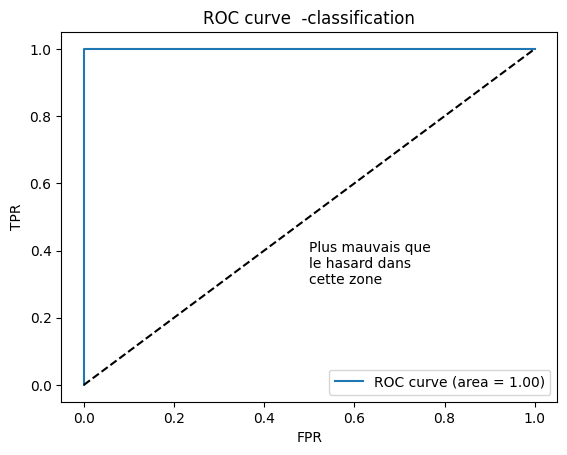

In [34]:
ax=plt.axes()
probs = model.predict_proba(X_scaled_test)[:,1]
fpr,tpr,thresholds = metrics.roc_curve(y_test,probs)
roc_auc = metrics.auc(fpr,tpr)
ax.plot(fpr,tpr,label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0,1],[0,1],"k--")
ax.set_title("ROC curve  -classification")
ax.text(0.5,0.3,"Plus mauvais que\nle hasard dans\ncette zone")
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.legend()
plt.show()

### Q6. Les données que nous considérons dans cette question sont non linéairement séparable. Tourner votre code avec ces deux ensembles de données. Qu’est-ce que vous constatez ? Proposer une solution pour améliorer la qualité de la classification (utiliser la fonction PolynomialFeatures).

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1)
X = poly.fit_transform(X_scaled_train)


In [36]:
# Ensemble 1
from sklearn.datasets import make_gaussian_quantiles
X,y = make_gaussian_quantiles(n_samples=500,n_classes=2,random_state=3)


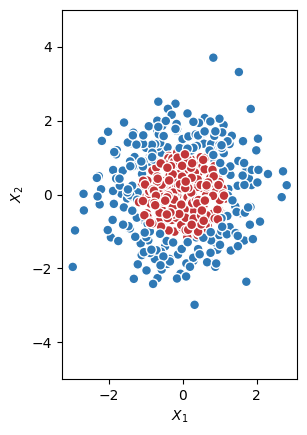

In [37]:
# Visualisation
axes = plt.axes()
plt.scatter(X[:,0],X[:,1], c=y.ravel(), s=50,cmap="RdBu", vmin=-.2,vmax=1.2,edgecolor="white", linewidth=1)
axes.set(aspect="equal",ylim=(-5, 5), xlabel="$X_1$", ylabel="$X_2$")
plt.show()

### Log Reg sur ensmble1

In [38]:
model =LogisticRegression()
model.fit(X,y)
y_pred = model.predict(X)


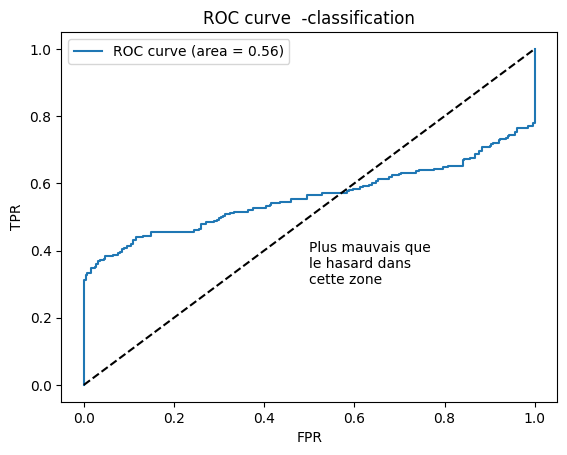

In [39]:
## La courbe roc
ax=plt.axes()
probs = model.predict_proba(X)[:,1]
fpr,tpr,thresholds = metrics.roc_curve(y,probs)
roc_auc = metrics.auc(fpr,tpr)
ax.plot(fpr,tpr,label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0,1],[0,1],"k--")
ax.set_title("ROC curve  -classification")
ax.text(0.5,0.3,"Plus mauvais que\nle hasard dans\ncette zone")
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.legend()

### KNN sur ensemble1

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)
y_pred = knn.predict(X)

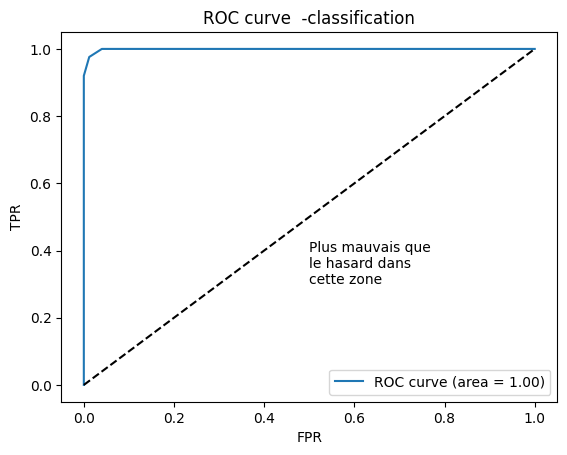

In [43]:
# La courble roc
ax=plt.axes()
probs = knn.predict_proba(X)[:,1]
fpr,tpr,thresholds = metrics.roc_curve(y,probs)
roc_auc = metrics.auc(fpr,tpr)
ax.plot(fpr,tpr,label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0,1],[0,1],"k--")
ax.set_title("ROC curve  -classification")
ax.text(0.5,0.3,"Plus mauvais que\nle hasard dans\ncette zone")
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.legend()


In [44]:
## Ensemble2
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=500,noise=0.3,random_state=0)

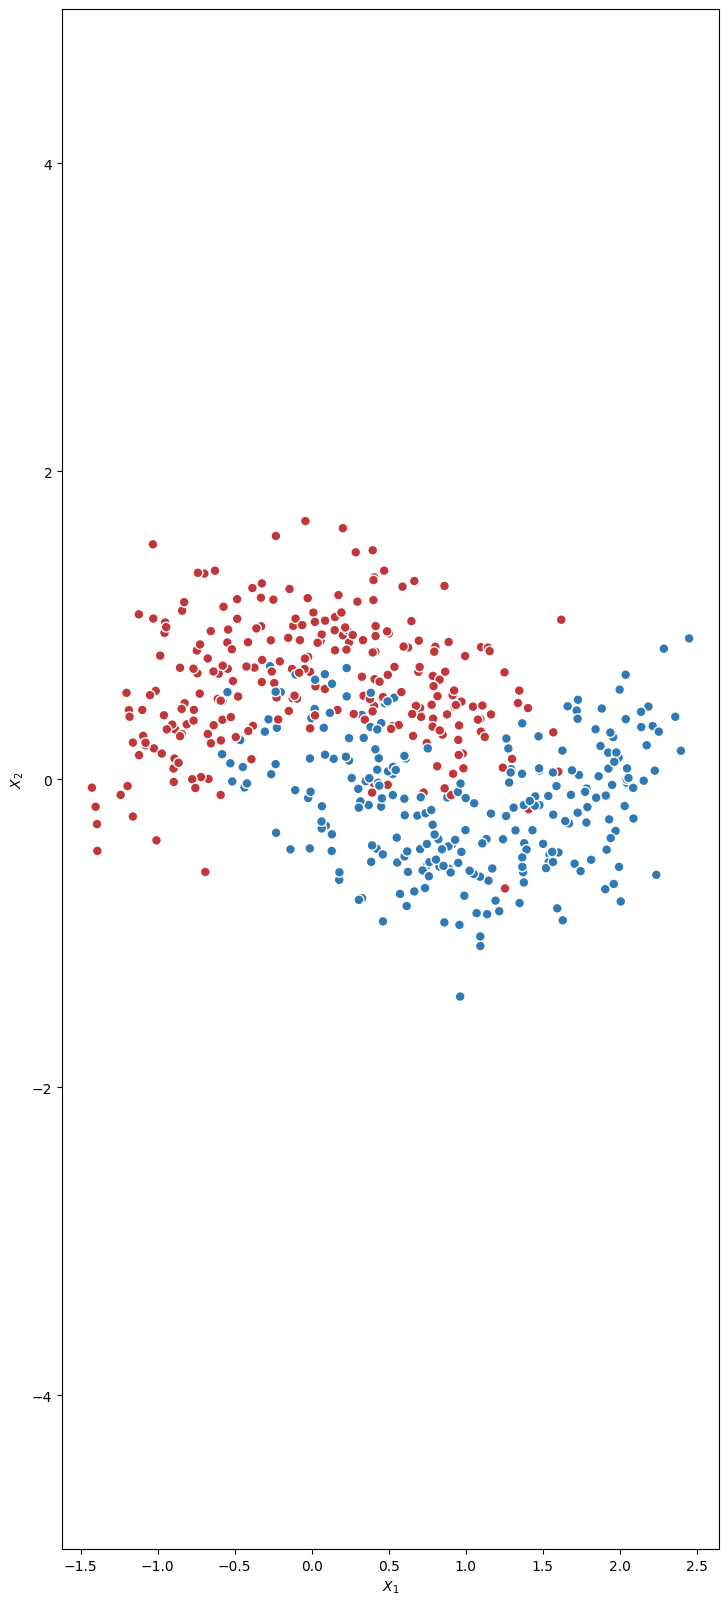

In [56]:
## Visualisation
plt.figure(figsize=(20,20))
axes = plt.axes()
plt.scatter(X[:,0],X[:,1], c=y.ravel(), s=50,cmap="RdBu", vmin=-.2,vmax=1.2,edgecolor="white", linewidth=1)
axes.set(aspect="equal",ylim=(-5, 5), xlabel="$X_1$", ylabel="$X_2$")
plt.show()


### Log Reg sur ensemble2

In [54]:
model =LogisticRegression()
model.fit(X,y)
y_pred = model.predict(X)

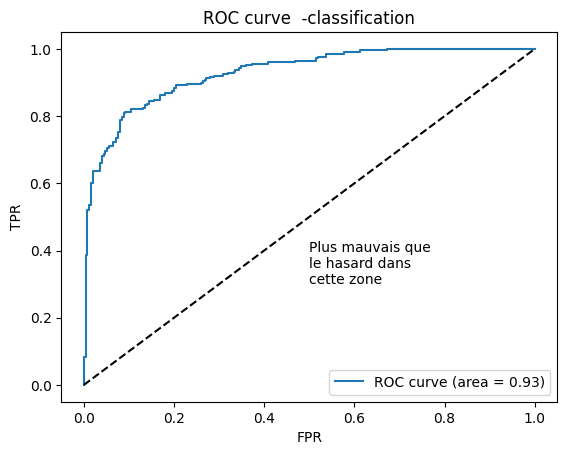

In [55]:
# courbe roc
ax=plt.axes()
probs = model.predict_proba(X)[:,1]
fpr,tpr,thresholds = metrics.roc_curve(y,probs)
roc_auc = metrics.auc(fpr,tpr)
ax.plot(fpr,tpr,label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0,1],[0,1],"k--")
ax.set_title("ROC curve  -classification")
ax.text(0.5,0.3,"Plus mauvais que\nle hasard dans\ncette zone")
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.legend()


### KNN sur ensemble2

In [57]:
knn= KNeighborsClassifier()
knn.fit(X,y)
y_pred = knn.predict(X)


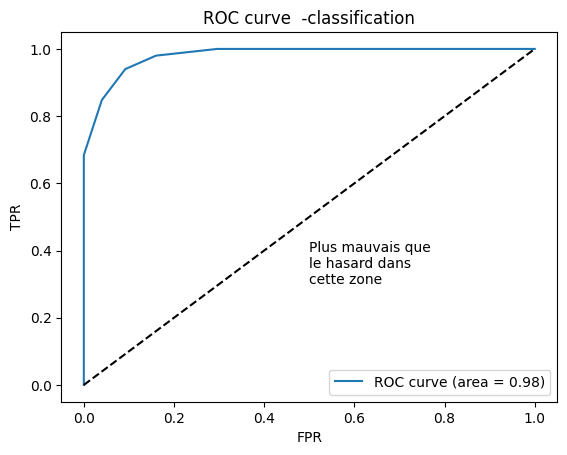

In [58]:
## Courbe roc
ax=plt.axes()
probs = knn.predict_proba(X)[:,1]
fpr,tpr,thresholds = metrics.roc_curve(y,probs)
roc_auc = metrics.auc(fpr,tpr)
ax.plot(fpr,tpr,label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0,1],[0,1],"k--")
ax.set_title("ROC curve  -classification")
ax.text(0.5,0.3,"Plus mauvais que\nle hasard dans\ncette zone")
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.legend()

### Q7. Nous considérons, dans cette question, des données avec un nombre de features supérieur à 2. Tourner votre code avec ces nouvelles données. Qu’est-ce que vous constatez ? Modifier le code pour qu’il soit adapté à ces données.

In [59]:
## Ensemble 3
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000,n_features=5,n_classes=2,n_informative=2,random_state=4,n_redundant=2)


### Log Reg avec penalty 


In [61]:
model =LogisticRegression(penalty="l1",solver="liblinear",C=10)
model.fit(X,y)
y_pred = model.predict(X)

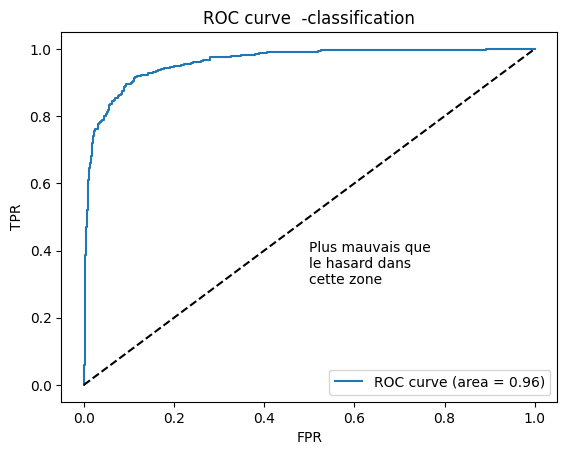

In [62]:
# Courbe roc
ax=plt.axes()
probs = model.predict_proba(X)[:,1]
fpr,tpr,thresholds = metrics.roc_curve(y,probs)
roc_auc = metrics.auc(fpr,tpr)
ax.plot(fpr,tpr,label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0,1],[0,1],"k--")
ax.set_title("ROC curve  -classification")
ax.text(0.5,0.3,"Plus mauvais que\nle hasard dans\ncette zone")
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.legend()


### Q9. Nous considérons l’ensemble des données IRIS multiclasses, sur lequel nous appliquons les deux modèles : LogisticRegression et KNeighborsClassifier. Comparer les performances de ces deux méthodes.

In [64]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)
model =LogisticRegression(multi_class="ovr")
model.fit(X,y)
y_pred = model.predict(X)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [66]:
# # Courbe roc
# ax=plt.axes()
# probs = model.predict_proba(X)
# fpr,tpr,thresholds = metrics.roc_curve(y,probs,multi_class="ovr")
# roc_auc = metrics.auc(fpr,tpr)
# ax.plot(fpr,tpr,label=f"ROC curve (area = {roc_auc:.2f})")
# plt.plot([0,1],[0,1],"k--")
# ax.set_title("ROC curve  -classification")
# ax.text(0.5,0.3,"Plus mauvais que\nle hasard dans\ncette zone")
# ax.set_xlabel("FPR")
# ax.set_ylabel("TPR")
# ax.legend()
